In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib #saving the model in binary formate
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight")

### Perceptron skeleton  :)

In [2]:
np.random.randn(3)*1e-4

array([2.10409847e-05, 2.63970150e-04, 1.88641363e-05])

In [3]:
#the blue Print of perceptron

class Perceptron:
    def __init__(self,eta: float=None, epochs: int=None): 
        #eta stand for learning rate
        #epochs =complete cycle of (forword_propogation+backword_propogation)
        try:
            pass
        except Exception as e:
            raise e
            
    def _z_outcome(self):
        try:
            pass
        except Exception as e:
            raise e

    def activation_funtion(self):
        try:
            pass
        except Exception as e:
            raise e

    def fit(self):
        try:
            pass
        except Exception as e:
            raise e
    
    def predict(self):
        try:
            pass
        except Exception as e:
            raise e
    
    def total_loss(self):
        try:
            pass
        except Exception as e:
            raise e
    
    def _create_dir_return_path(self):
        try:
            pass
        except Exception as e:
            raise e
    
    def save(self):
        try:
            pass
        except Exception as e:
            raise e

    def load(self):
        try:
            pass
        except Exception as e:
            raise e
    
        

## Let's Implement the Perceptron

In [4]:
#the blue Print of perceptron

class Perceptron:
    def __init__(self,eta: float=None, epochs: int=None): 
        #eta stand for learning rate
        #epochs =complete cycle of (forword_propogation+backword_propogation)
        try:
            self.weights = np.random.randn(3)*1e-4 # giving small random weights
            training = (eta is not None) and (epochs is not None)
            
            if training:
                print(f"Initial weights before training :\n {self.weights}")
            self.eta = eta
            self.epochs = epochs
            
        except Exception as e:
            raise e
            
    def _z_outcome(self, inputs_with_bais, weights):
        try:
            return np.dot(inputs_with_bais,weights)
        except Exception as e:
            raise e

    def activation_funtion(self,z):
        try:
            return np.where(z > 0 ,1,0)
        except Exception as e:
            raise e

    def fit(self, x, y):
        try:
            self.x = x
            self.y = y
            
            x_with_bais = np.c_[self.x,-np.ones((len(self.x), 1))]
            print(f"X with bais : \n{x_with_bais}")

            for epoch in range(self.epochs):
                print("--"*10)
                print(f"for epoch >> {epoch}")
                print("--"*10)
                
                z = self._z_outcome(x_with_bais, self.weights)
                y_hat = self.activation_funtion(z)
                print(f"Predicted value after forward pass : \n{y_hat}")
                
                self.error = self.y-y_hat
                print(f"error : \n{self.error}")
            
                self.weights = self.weights+ self.eta*np.dot(x_with_bais.T,self.error)
                print(f"Updated weights after epochs : {epoch+1}/{self.epochs} : \n{self.weights}")
                print("===="*10)
                
        except Exception as e:
            raise e
    
    def predict(self,x):
        try:
            x_with_bais = np.c_[x,-np.ones((len(x), 1))]
            z = self._z_outcome(x_with_bais,self.weights)
            return self.activation_funtion(z)
            
        except Exception as e:
            raise e
    
    def total_loss(self):
        try:
            total_loss = np.sum(self.error)
            print(f"\n total loss : {total_loss}\n")
            return total_loss
            
        except Exception as e:
            raise e
    
    def _create_dir_return_path(self, model_dir, filename):
        try:
            os.makedirs(model_dir,exist_ok= True)
            return os.path.join(model_dir,filename)
            
        except Exception as e:
            raise e
    
    def save(self,filename,model_dir=None):
        try:
            if model_dir is not None:
                model_file_path = self._create_dir_return_path(model_dir, filename)
                joblib.dump(self,model_file_path)
                
            else:
                model_file_path = self._create_dir_return_path('model',filename)
                joblib.dump(self,model_file_path)
        except Exception as e:
            raise e

    def load(self,filepath):
        try:
            return joblib.load(filepath)
        except Exception as e:
            raise e
    
        

## Let's Utilize our Perceptron class

In [5]:
def prepare_data(df,target_cols:str = 'y'):
    try:
        x = df.drop(target_cols,axis=1)
        y=df[target_cols]

        return x,y
    except Exception as e:
        raise e

In [6]:
AND = {
    'x1': [0,0,1,1],
    'x2': [0,1,0,1],
    'y' : [0,0,0,1]
}

# dict data converting into a data frame

df_AND = pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [7]:
x,y = prepare_data(df_AND,'y')

In [8]:
x

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [9]:
y

0    0
1    0
2    0
3    1
Name: y, dtype: int64

In [10]:
x,y = prepare_data(df_AND)
ETA = 0.1 # eta lies between 0 to 1
EPOCHS = 10

model_and = Perceptron(ETA,EPOCHS)
model_and.fit(x,y)
_ = model_and.total_loss()

Initial weights before training :
 [ 9.81091435e-05  1.73161477e-05 -7.94234882e-06]
X with bais : 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
Predicted value after forward pass : 
[1 1 1 1]
error : 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
Updated weights after epochs : 1/10 : 
[-0.09990189 -0.09998268  0.29999206]
--------------------
for epoch >> 1
--------------------
Predicted value after forward pass : 
[0 0 0 0]
error : 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights after epochs : 2/10 : 
[9.81091435e-05 1.73161477e-05 1.99992058e-01]
--------------------
for epoch >> 2
--------------------
Predicted value after forward pass : 
[0 0 0 0]
error : 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated weights after epochs : 3/10 : 
[0.10009811 0.10001732 0.09999206]
--------------------
for epoch >> 3
--------------------
Predicted value after forward pass : 
[0 1 1 1]
error

## Saving the Model in the directory

In [11]:
model_and.save(filename='and.model',model_dir="Logical_model")

##  `Loading the model`

In [12]:
load_and = Perceptron().load(filepath='Logical_model/and.model')
load_and

### Doing the prediction

In [13]:
load_and.predict(x=[[0,0]])

array([0])

In [14]:
## Let's Predict Hole data 
x

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [15]:
load_and.predict(x)

array([0, 0, 0, 1])

In [16]:
OR = {
    'x1': [0,0,1,1],
    'x2': [0,1,0,1],
    'y' : [0,1,1,1]
}

# dict data converting into a data frame

df_OR = pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [17]:
X,y = prepare_data(df_OR)

ETA = 0.1
EPOCHS = 10

model_or = Perceptron(eta=ETA,epochs=EPOCHS)
model_or.fit(X,y)

_ = model_or.total_loss()


Initial weights before training :
 [ 9.89565939e-06  6.60759792e-05 -2.29421155e-04]
X with bais : 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
Predicted value after forward pass : 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after epochs : 1/10 : 
[9.89565939e-06 6.60759792e-05 9.97705788e-02]
--------------------
for epoch >> 1
--------------------
Predicted value after forward pass : 
[0 0 0 0]
error : 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
Updated weights after epochs : 2/10 : 
[ 0.2000099   0.20006608 -0.20022942]
--------------------
for epoch >> 2
--------------------
Predicted value after forward pass : 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
Updated weights after epochs : 3/10 : 
[ 0.2000099   0.20006608 -0.10022942]
--------------------
for epoch >> 3
--------------------
Predicted value after forward pass : 
[1 1 1 1]
er

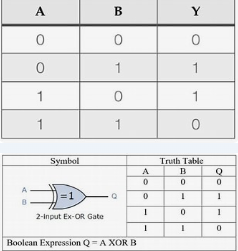

In [18]:
XOR = {
    'x1': [0,0,1,1],
    'x2': [0,1,0,1],
    'y' : [0,1,1,0]
}

# dict data converting into a data frame

df_XOR = pd.DataFrame(XOR)
df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [19]:
X,y = prepare_data(df_XOR)

ETA = 0.1
EPOCHS = 20

model_xor = Perceptron(eta=ETA,epochs=EPOCHS)
model_xor.fit(X,y)

_ = model_xor.total_loss()


Initial weights before training :
 [ 0.00022823 -0.00015588  0.00013469]
X with bais : 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 0
--------------------
Predicted value after forward pass : 
[0 0 1 0]
error : 
0    0
1    1
2    0
3    0
Name: y, dtype: int64
Updated weights after epochs : 1/20 : 
[ 0.00022823  0.09984412 -0.09986531]
--------------------
for epoch >> 1
--------------------
Predicted value after forward pass : 
[1 1 1 1]
error : 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
Updated weights after epochs : 2/20 : 
[-0.09977177 -0.00015588  0.10013469]
--------------------
for epoch >> 2
--------------------
Predicted value after forward pass : 
[0 0 0 0]
error : 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
Updated weights after epochs : 3/20 : 
[ 0.00022823  0.09984412 -0.09986531]
--------------------
for epoch >> 3
--------------------
Predicted value after forward pass : 
[1 1 1 1]
error : 
0   -1
1    0


In [23]:
def save_plot(df, model, plot_dir = 'plots' ,filename='plot.png'):
    try:
        def _create_base_plot(df):
            df.plot(kind = 'scatter',x='x1',y='x2',c= 'y',s = 100,cmap='coolwarm')
            plt.axhline(y=0,color = 'black', linestyle = '--',linewidth=1)
            plt.axvline(x=0,color = 'black', linestyle = '--',linewidth=1)
            
            figure = plt.gcf()
            figure.set_size_inches(10,8)
        
        def _plot_decision_regions(X, y, classifier, resolution=0.02):
            colors = ('cyan', 'lightgreen')
            cmap = ListedColormap(colors)
            
            X = X.values
            x1 = X[:,0]
            x2 = X[:,1]
            
            x1_min,x1_max = x1.min() - 1, x1.max() + 1
            x2_min,x2_max = x2.min() - 1, x2.max() + 1 
            
            xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                                   np.arange(x2_min, x2_max, resolution)
                                  )
            
            y_hat = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
            y_hat = y_hat.reshape(xx1.shape)
            
            plt.contourf(xx1,xx2, y_hat, alpha = 0.3, cmap =cmap)
            plt.xlim(xx1.min(), xx1.max())
            plt.xlim(xx2.min(), xx2.max())
            
            plt.plot()
            plt.show()
            
        
        X,y = prepare_data(df)
        
        _create_base_plot(df)
        _plot_decision_regions(X,y,model)
        
        os.makedirs(plot_dir,exist_ok=True)
        plot_path = os.path.join(plot_dir,filename)
        
        plt.savefig(plot_path)
        
    except Exception as e:
        raise e
    

In [24]:
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


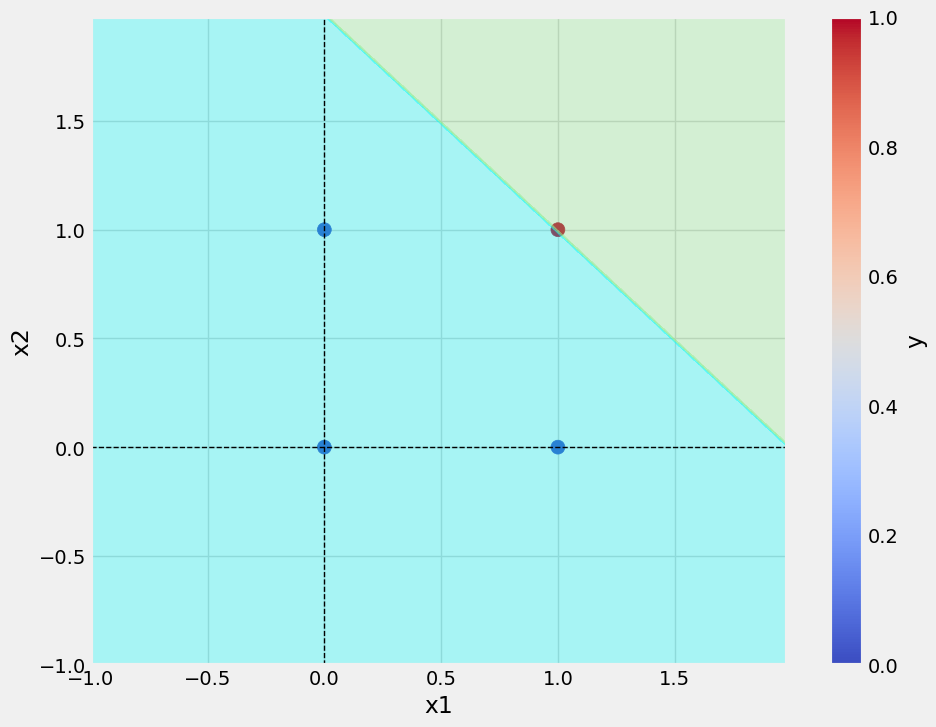

<Figure size 640x480 with 0 Axes>

In [26]:
save_plot(df=df_AND,model=model_and,filename='AND.png')

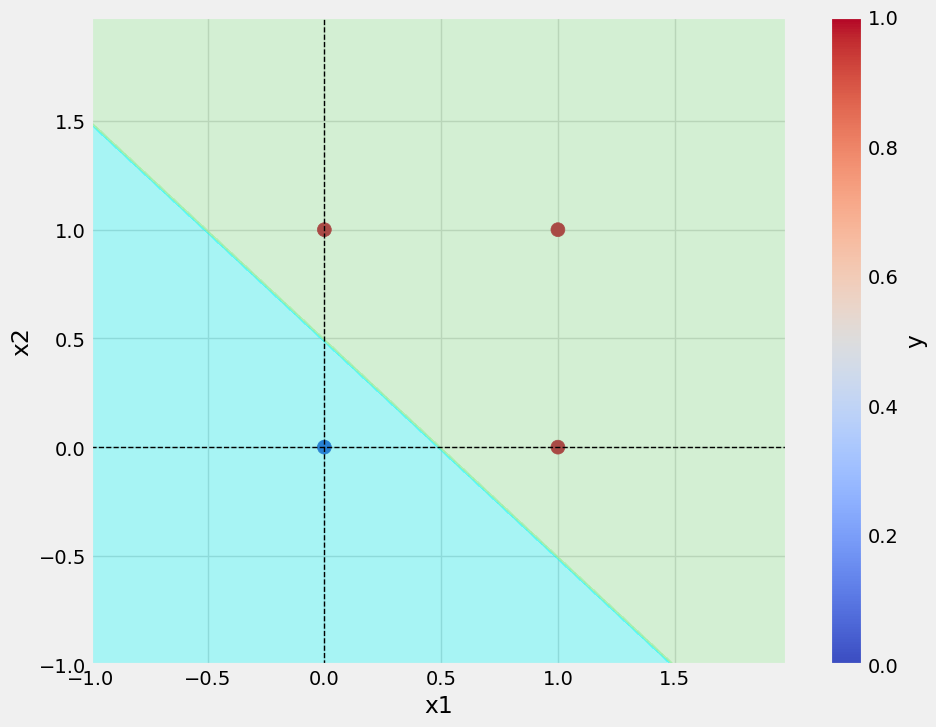

<Figure size 640x480 with 0 Axes>

In [27]:
save_plot(df=df_OR,model=model_or,filename='OR.png')

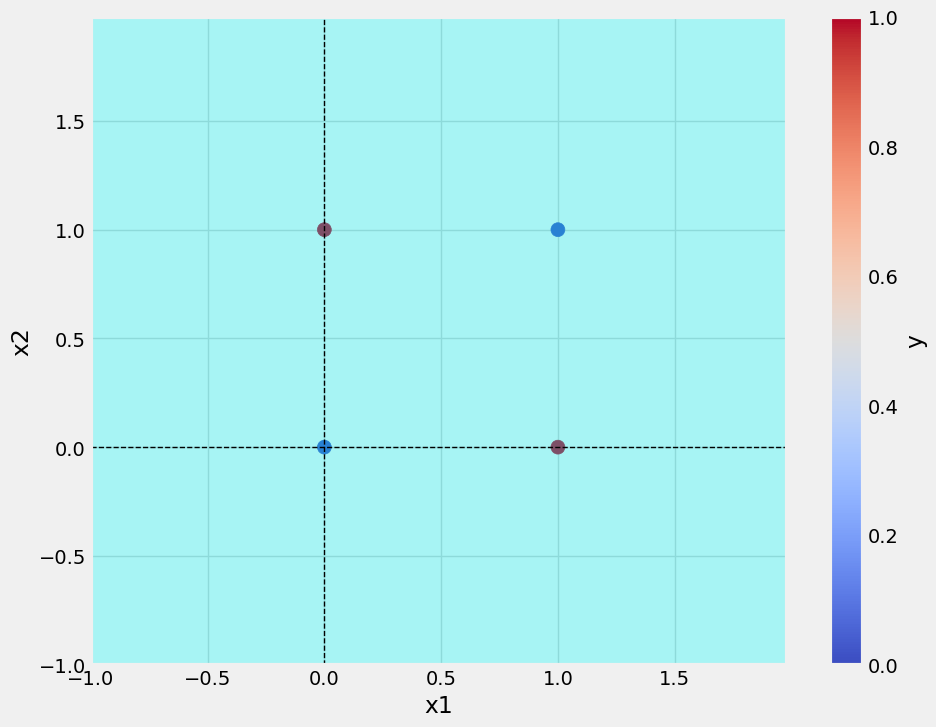

<Figure size 640x480 with 0 Axes>

In [28]:
save_plot(df=df_XOR,model=model_xor,filename='XOR.png')